<a href="https://colab.research.google.com/github/genceg/DSA210/blob/main/projectfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dsa 210 Project (Gence Genceli 34184)**



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway

 **Merged dataset**


In [3]:
df = pd.read_csv('processed_2014_2024.csv')


**Converting Physical Inactivity columns to numeric**

In [4]:
inact_cols = [c for c in df.columns if 'Physical Inactivity, Adults Aged' in c]
for col in inact_cols:
    df[col] = df[col].str.rstrip('%').astype(float)

# H1: Football Success vs. Happiness


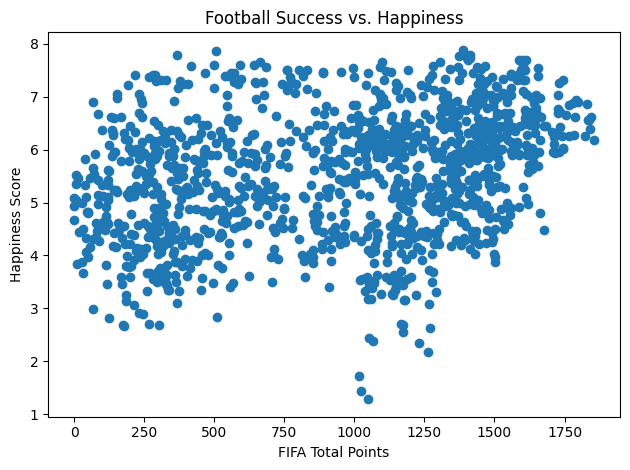

In [5]:
plt.figure()
plt.scatter(df['total_points'], df['HappinessScore'])
plt.xlabel('FIFA Total Points')
plt.ylabel('Happiness Score')
plt.title('Football Success vs. Happiness')
plt.tight_layout()
plt.show()

# H2: HDI vs. Happiness


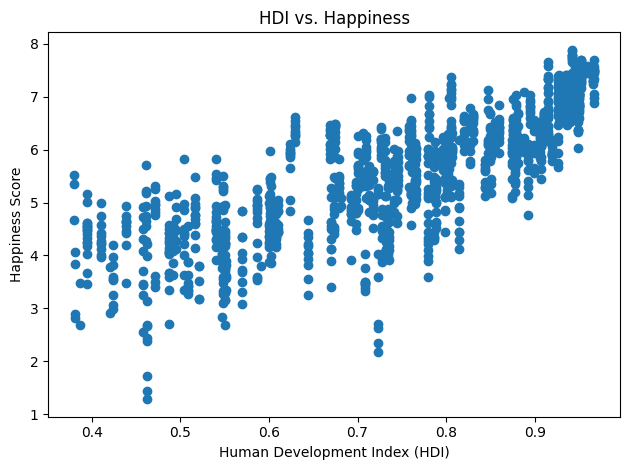

In [6]:
plt.figure()
plt.scatter(df['HDI'], df['HappinessScore'])
plt.xlabel('Human Development Index (HDI)')
plt.ylabel('Happiness Score')
plt.title('HDI vs. Happiness')
plt.tight_layout()
plt.show()

# H3: Comfort Index vs. Happiness


Subtracting absolute deviation from 22°C

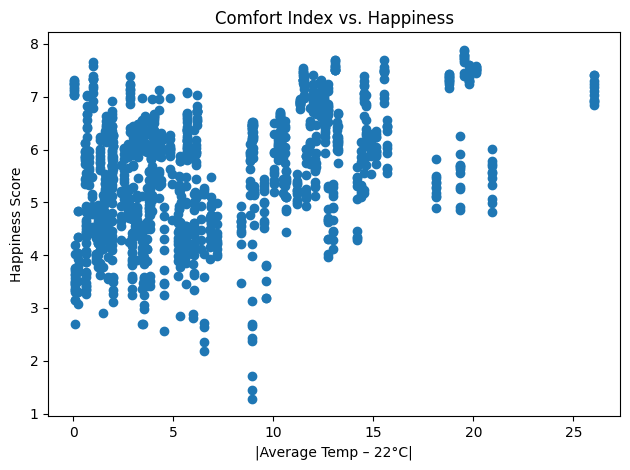

In [7]:
df['ComfortDiff'] = np.abs(df['AvgTemp'] - 22)
plt.figure()
plt.scatter(df['ComfortDiff'], df['HappinessScore'])
plt.xlabel('|Average Temp – 22°C|')
plt.ylabel('Happiness Score')
plt.title('Comfort Index vs. Happiness')
plt.tight_layout()
plt.show()

# H4: Physical Activity vs. Happiness


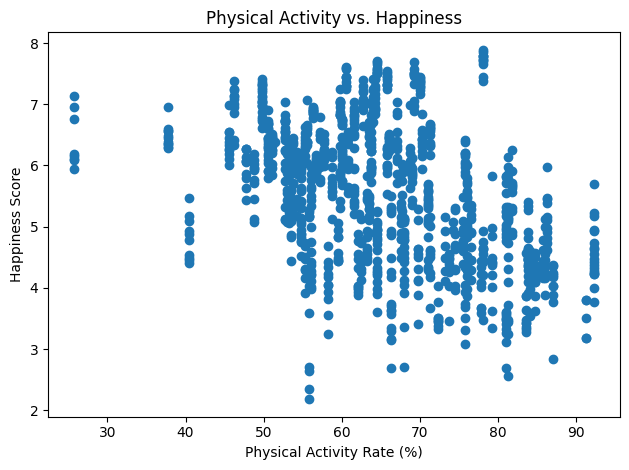

In [8]:
df['AdultInactivity'] = df[inact_cols].mean(axis=1)
df['ActivityRate'] = 100 - df['AdultInactivity']
plt.figure()
plt.scatter(df['ActivityRate'], df['HappinessScore'])
plt.xlabel('Physical Activity Rate (%)')
plt.ylabel('Happiness Score')
plt.title('Physical Activity vs. Happiness')
plt.tight_layout()
plt.show()

# H5: Internet Use vs. Happiness


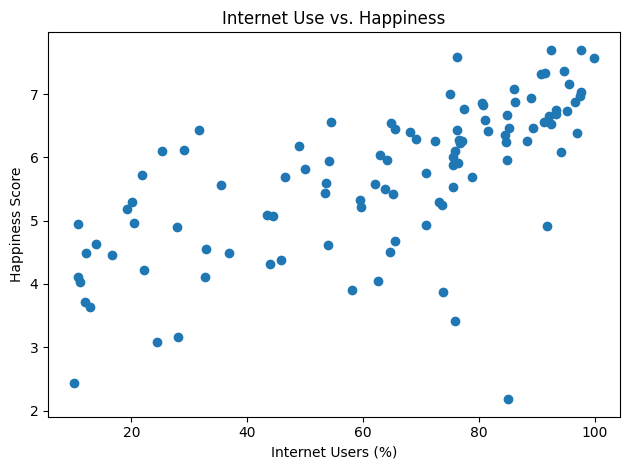

In [9]:
plt.figure()
plt.scatter(df['InternetPct'], df['HappinessScore'])
plt.xlabel('Internet Users (%)')
plt.ylabel('Happiness Score')
plt.title('Internet Use vs. Happiness')
plt.tight_layout()
plt.show()

# H6: Income Inequality vs. Happiness


<Figure size 640x480 with 0 Axes>

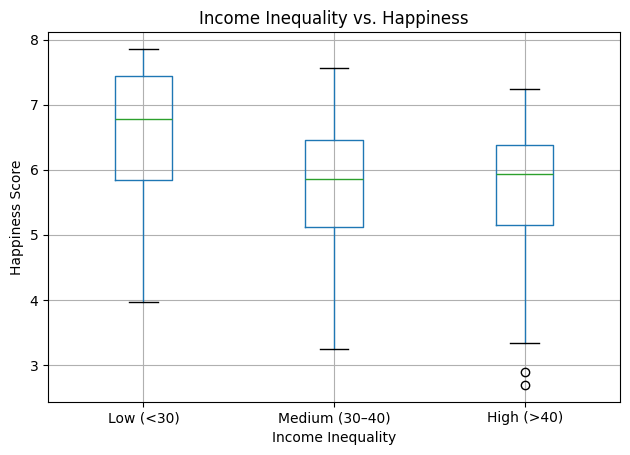

In [10]:
df['GiniCat'] = pd.cut(
    df['GiniIndex'], bins=[-np.inf,30,40,np.inf],
    labels=['Low (<30)','Medium (30–40)','High (>40)']
)
plt.figure()
df.boxplot(column='HappinessScore', by='GiniCat')
plt.xlabel('Income Inequality')
plt.ylabel('Happiness Score')
plt.title('Income Inequality vs. Happiness')
plt.suptitle('')
plt.tight_layout()
plt.show()

# Histograms of Key Variables


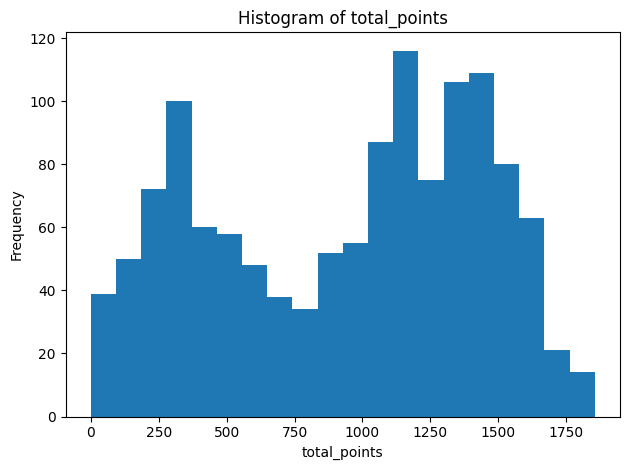

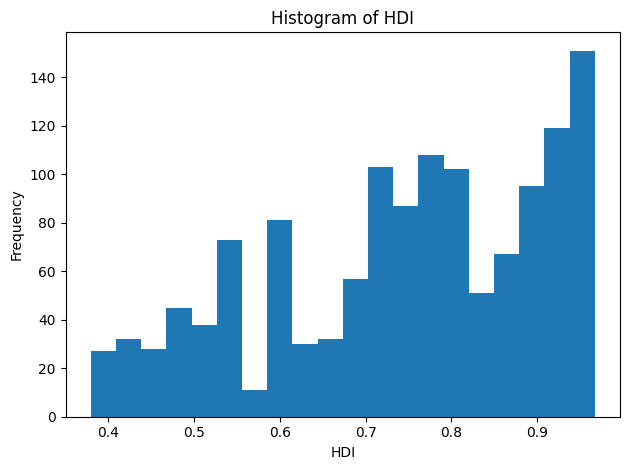

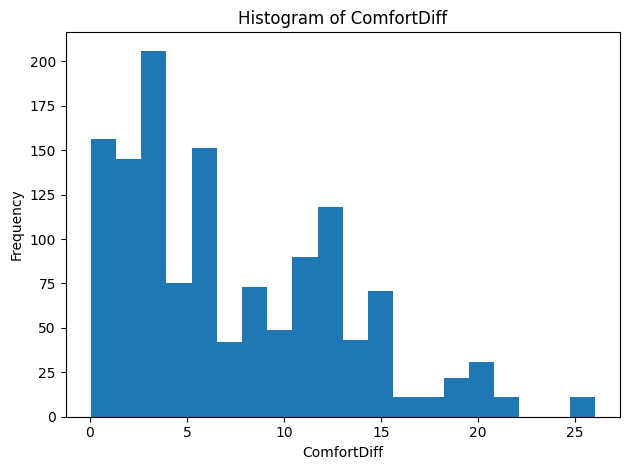

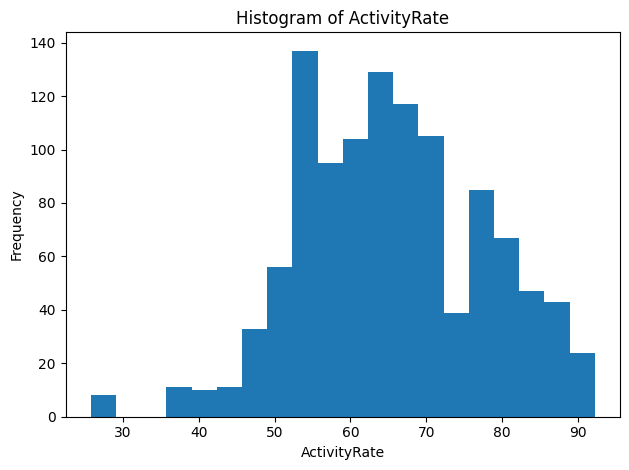

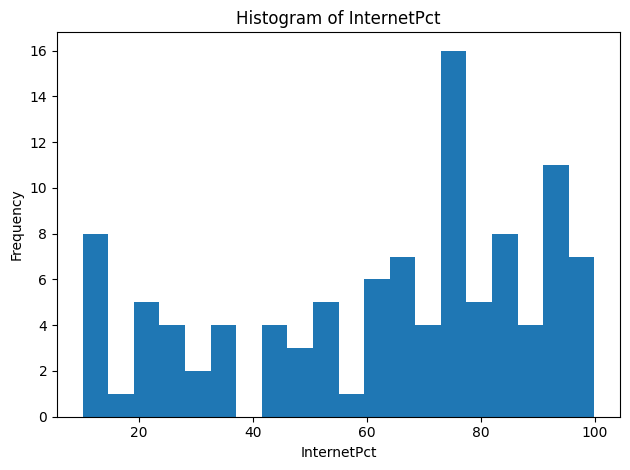

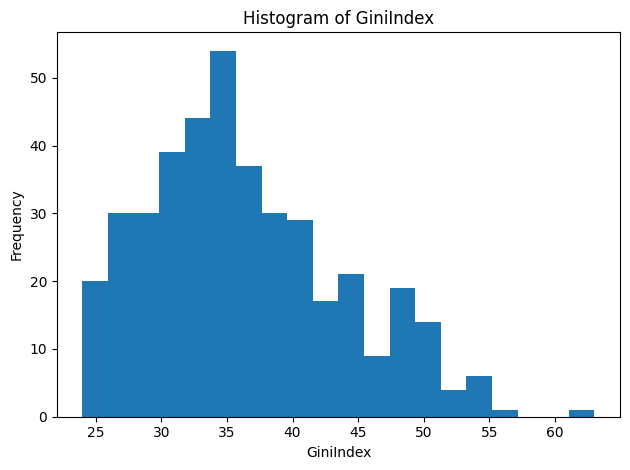

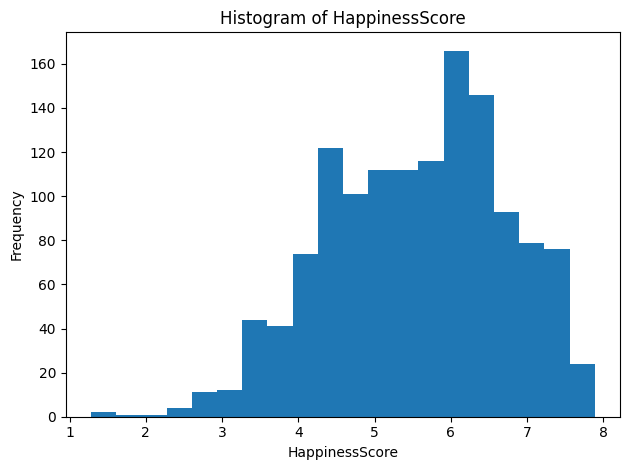

In [11]:
numeric_cols = ['total_points','HDI','ComfortDiff','ActivityRate','InternetPct','GiniIndex','HappinessScore']
for col in numeric_cols:
    plt.figure()
    plt.hist(df[col].dropna(), bins=20)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Correlation Heatmap (Matplotlib)


<Figure size 800x600 with 0 Axes>

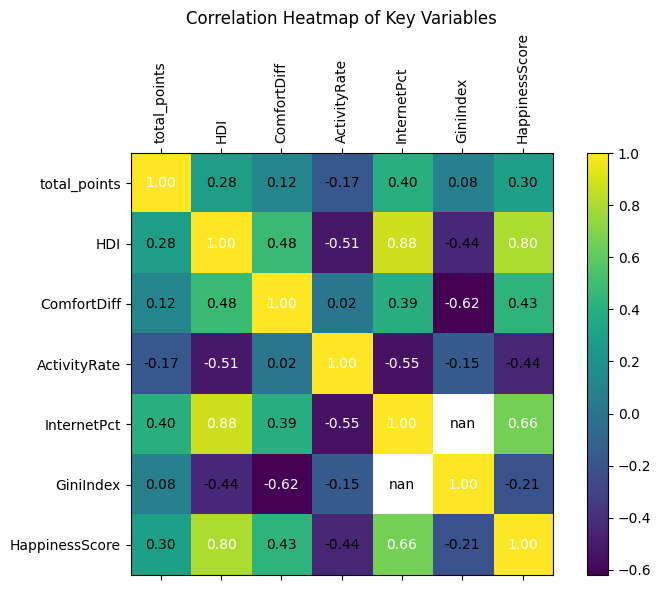

In [12]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
fig, ax = plt.subplots(figsize=(8,6))
cax = ax.matshow(corr, cmap='viridis')
fig.colorbar(cax)
ax.set_xticks(range(len(numeric_cols)))
ax.set_yticks(range(len(numeric_cols)))
ax.set_xticklabels(numeric_cols, rotation=90)
ax.set_yticklabels(numeric_cols)
for (i, j), val in np.ndenumerate(corr.values):
    ax.text(j, i, f"{val:.2f}", ha='center', va='center', color='white' if abs(val) > 0.5 else 'black')
plt.title('Correlation Heatmap of Key Variables')
plt.tight_layout()
plt.show()


# Finding p-values for Each Hypothesis


In [15]:
# H1) FIFA points vs. Happiness
h1 = df[['total_points','HappinessScore']].dropna()
r1, p1 = pearsonr(h1['total_points'], h1['HappinessScore'])

# H2) HDI vs. Happiness
h2 = df[['HDI','HappinessScore']].dropna()
r2, p2 = pearsonr(h2['HDI'], h2['HappinessScore'])

# H3) Comfort Index vs. Happiness
h3 = df[['ComfortDiff','HappinessScore']].dropna()
r3, p3 = pearsonr(h3['ComfortDiff'], h3['HappinessScore'])

# H4) Physical Activity vs. Happiness
h4 = df[['ActivityRate','HappinessScore']].dropna()
r4, p4 = pearsonr(h4['ActivityRate'], h4['HappinessScore'])

# H5) Internet Use vs. Happiness
h5 = df[['InternetPct','HappinessScore']].dropna()
r5, p5 = pearsonr(h5['InternetPct'], h5['HappinessScore'])

# H6) Income Inequality vs. Happiness (ANOVA)
groups = [group['HappinessScore'].dropna() for _, group in df.groupby('GiniCat', observed=True)]
f_stat, p6 = f_oneway(*groups)

Checking p-test results


In [16]:
results = pd.DataFrame({
    'Hypothesis': [
        'H1: FIFA Success vs. Happiness',
        'H2: HDI vs. Happiness',
        'H3: Comfort Index vs. Happiness',
        'H4: Physical Activity vs. Happiness',
        'H5: Internet Use vs. Happiness',
        'H6: Income Inequality vs. Happiness'
    ],
    'Statistic': [r1, r2, r3, r4, r5, f_stat],
    'p-value': [p1, p2, p3, p4, p5, p6]
})
results['Significant (p < 0.05)'] = results['p-value'] < 0.05

print(results.to_string(index=False))

                         Hypothesis  Statistic       p-value  Significant (p < 0.05)
     H1: FIFA Success vs. Happiness   0.296882  2.125894e-27                    True
              H2: HDI vs. Happiness   0.801139 6.242973e-300                    True
    H3: Comfort Index vs. Happiness   0.433850  1.595438e-61                    True
H4: Physical Activity vs. Happiness  -0.444887  1.368044e-55                    True
     H5: Internet Use vs. Happiness   0.664171  1.132031e-14                    True
H6: Income Inequality vs. Happiness  22.680414  4.647163e-10                    True


By this, we can determine whether the null hypothesis is rejected or not.


In [17]:
for _, row in results.iterrows():
    hyp = row['Hypothesis']
    stat = row['Statistic']
    p = row['p-value']
    if hyp.startswith('H6'):  # ANOVA value for H6
        print(f"{hyp}")
        print(f"F = {stat:.2f}, P-Value = {p:.2e}")
    else:                    # Pearson value
        print(f"{hyp}")
        print(f"r = {stat:.2f}, P-Value = {p:.2e}")
    if p < 0.05:
        print("The p-value is less than 0.05. We reject the null hypothesis.\n")
    else:
        print("The p-value is greater than or equal to 0.05. We fail to reject the null hypothesis.\n")

H1: FIFA Success vs. Happiness
r = 0.30, P-Value = 2.13e-27
The p-value is less than 0.05. We reject the null hypothesis.

H2: HDI vs. Happiness
r = 0.80, P-Value = 6.24e-300
The p-value is less than 0.05. We reject the null hypothesis.

H3: Comfort Index vs. Happiness
r = 0.43, P-Value = 1.60e-61
The p-value is less than 0.05. We reject the null hypothesis.

H4: Physical Activity vs. Happiness
r = -0.44, P-Value = 1.37e-55
The p-value is less than 0.05. We reject the null hypothesis.

H5: Internet Use vs. Happiness
r = 0.66, P-Value = 1.13e-14
The p-value is less than 0.05. We reject the null hypothesis.

H6: Income Inequality vs. Happiness
F = 22.68, P-Value = 4.65e-10
The p-value is less than 0.05. We reject the null hypothesis.



# **Machine Learning Model**

**Regression**: Predicting Happiness Score

**Goal:** Use six inputs—total_points, HDI, ComfortDiff (how far temperature is from 22 °C), ActivityRate (percent active adults), Internet usage, and Gini Index—to predict each country’s happiness score.

**Results:**

**Root Mean Squared Error (RMSE) and Mean Absolute Error (MAE):** show how big the prediction mistakes are, on average.

**R² (R-squared):** tells what fraction of the happiness differences the model can explain.

**Cross-Validation:** splits the training data in five ways to check that Linear and Ridge models will still work on new data.

**Random Forest Tuning:** tried different numbers of trees and depths to get the highest R².

**Best Model:** Random Forest gave the lowest RMSE and highest R² on the hold-out test set, so it predicts most accurately.

**Plot:** a scatter of real vs. predicted scores—points close to the diagonal line mean the model’s guesses match the true values well.

Linear CV R²: 0.657 ± 0.042
Ridge  CV R²: 0.657 ± 0.042
RF CV R²: 0.898

Test-Set Metrics:
Linear: RMSE=0.663, MAE=0.504, R²=0.672
Ridge: RMSE=0.662, MAE=0.504, R²=0.672
RF: RMSE=0.343, MAE=0.233, R²=0.912

Best model: RF


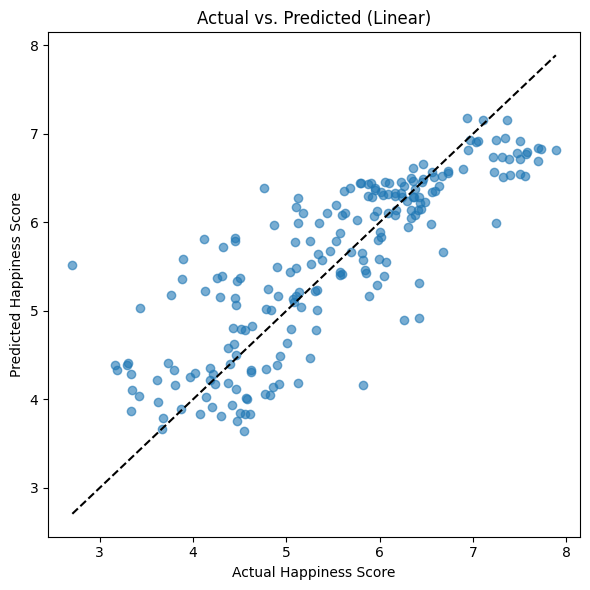

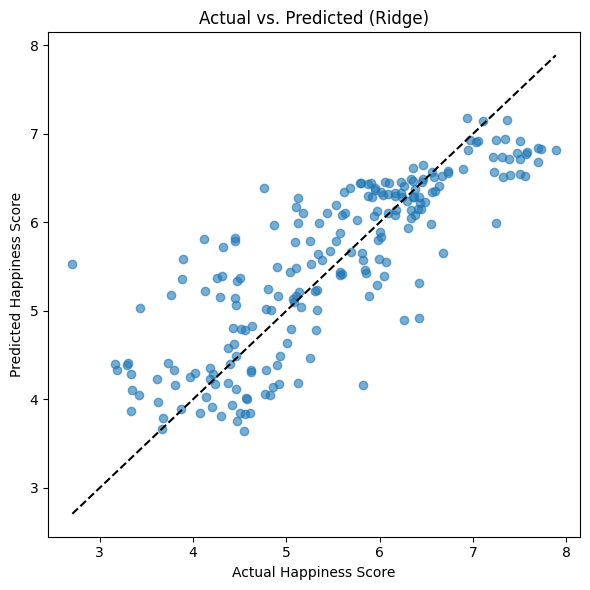

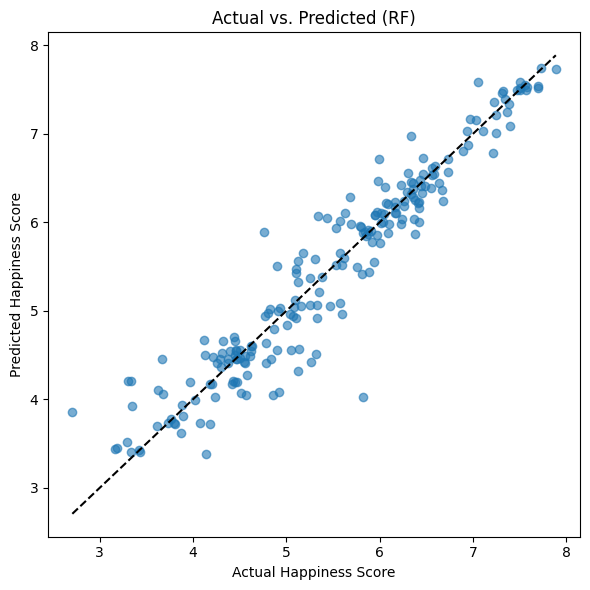

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv('processed_2014_2024.csv')
df['ComfortDiff'] = np.abs(df['AvgTemp'] - 22)
inact_cols = [c for c in df.columns if 'Physical Inactivity, Adults Aged' in c]
for c in inact_cols:
    df[c] = df[c].str.rstrip('%').astype(float)
df['ActivityRate'] = 100 - df[inact_cols].mean(axis=1)
df['InternetPct'] = df['InternetPct'].fillna(df['InternetPct'].median())
df['GiniIndex']   = df['GiniIndex'].fillna(df['GiniIndex'].median())
df = df.dropna(subset=['total_points','HDI','ComfortDiff','ActivityRate','InternetPct','GiniIndex','HappinessScore'])
X = df[['total_points','HDI','ComfortDiff','ActivityRate','InternetPct','GiniIndex']]
y = df['HappinessScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Cross-validation R² for Linear & Ridge
lr_scores    = cross_val_score(LinearRegression(), X_train_s, y_train, cv=5, scoring='r2')
ridge_scores = cross_val_score(Ridge(),           X_train_s, y_train, cv=5, scoring='r2')
print(f"Linear CV R²: {lr_scores.mean():.3f} ± {lr_scores.std():.3f}")
print(f"Ridge  CV R²: {ridge_scores.mean():.3f} ± {ridge_scores.std():.3f}")

# Random Forest Model
rf = RandomForestRegressor(random_state=42)
param_grid = {'n_estimators': [50,100,200], 'max_depth': [None,5,10]}
grid = GridSearchCV(rf, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print(f"RF CV R²: {grid.best_score_:.3f}")

models = [
    ('Linear', LinearRegression(), X_train_s, X_test_s),
    ('Ridge',  Ridge(),           X_train_s, X_test_s),
    ('RF',     best_rf,           X_train,   X_test)
]
results = {}
test_metrics = {}
for name, model, X_tr, X_te in models:
    model.fit(X_tr, y_train)
    preds = model.predict(X_te)
    results[name] = preds
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    mae  = mean_absolute_error(y_test, preds)
    r2   = r2_score(y_test, preds)
    test_metrics[name] = {'rmse': rmse, 'mae': mae, 'r2': r2}

print("\nTest-Set Metrics:")
for name, m in test_metrics.items():
    print(f"{name}: RMSE={m['rmse']:.3f}, MAE={m['mae']:.3f}, R²={m['r2']:.3f}")

# Identifying best model by lowest RMSE
best_model = min(test_metrics, key=lambda m: test_metrics[m]['rmse'])
print(f"\nBest model: {best_model}")

# Ploting Actual vs Predicted for each model
for name, preds in results.items():
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, preds, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
    plt.xlabel('Actual Happiness Score')
    plt.ylabel('Predicted Happiness Score')
    plt.title(f'Actual vs. Predicted ({name})')
    plt.tight_layout()
    plt.show()
